# Statement:
 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


In [2]:
#importing  required libraries
import pandas as pd
from pandas import Series, DataFrame

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Render plots inline
%matplotlib inline

In [5]:
import warnings
warnings.filterwarnings('ignore')

# Lodaing Titanic_data

In [6]:
# import data from csv file
df = pd.read_csv('titanic_data.csv')

In [7]:
# Looking at first few rows of dataset
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked.
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Checking For Titanic_data

In [8]:
# Checking the number of rows(observations) and colmumns(variables)
df.shape

(891, 12)

In [9]:
# get overall info for the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked.    889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked.        2
dtype: int64

# Few conclusions:
1. Missing values in Age, Cabin and Embarked columns
2. More than 70 percent values are missing in cabin columns, will have to drop
3. Few columns have inappropriate data types

In [11]:
#Dropping cabin column

df.drop(columns=['Cabin'],inplace=True)

In [12]:
#Imputing missing values for age
#Strategy - mean

df['Age'].fillna(df['Age'].mean(), inplace=True)

In [13]:
# Imputing missing values for embarked.

# finding the most appeared value in embarked column

df['Embarked.'].value_counts()

# S it is

df['Embarked.'].fillna('S', inplace=True)

In [14]:
# Want to check one more thing...

# Should I change the SibSp and Parch to categories

df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [15]:
df['Parch'].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

# Changing data type for the following columns
Survived(category)
PClass(category)
Sex(category)
Age(int)
Embarked.(category)

In [16]:
df['Survived']=df['Survived'].astype('category')
df['Pclass']=df['Pclass'].astype('category')
df['Sex']=df['Sex'].astype('category')
df['Age']=df['Age'].astype('int')
df['Embarked.']=df['Embarked.'].astype('category')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int32   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked.    891 non-null    category
dtypes: category(4), float64(1), int32(1), int64(3), object(2)
memory usage: 49.4+ KB


In [18]:
#Five point summary
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


# Univariate Analysis

0    549
1    342
Name: Survived, dtype: int64

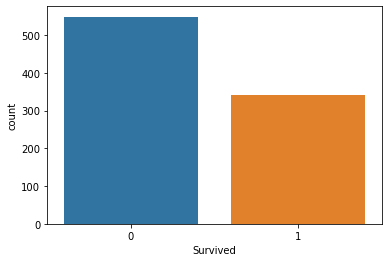

In [38]:
#let's check Survived

sns.countplot(df['Survived'])
df['Survived'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

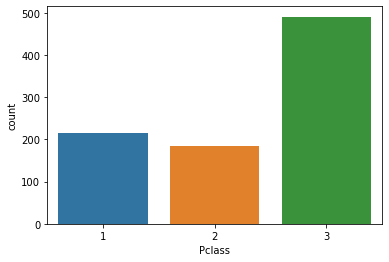

In [20]:
#Pclass column
sns.countplot(df['Pclass'])
df['Pclass'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

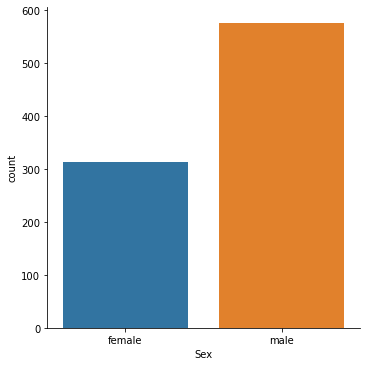

In [21]:
#Let's check gender
sns.factorplot('Sex', data=df, kind="count")
df['Sex'].value_counts()

Majority, 577 of the customers are male whereas Female are 314.

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

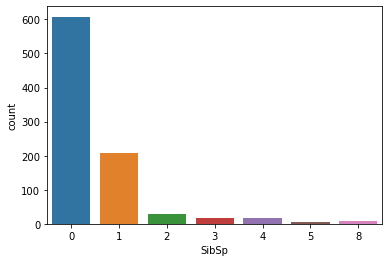

In [22]:
sns.countplot(df['SibSp'])
df['SibSp'].value_counts()

S    646
C    168
Q     77
Name: Embarked., dtype: int64

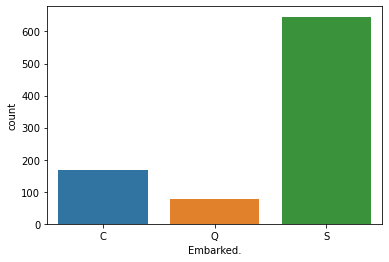

In [23]:
sns.countplot(df['Embarked.'])
df['Embarked.'].value_counts()

0.45956263424701577
0.9865867453652877


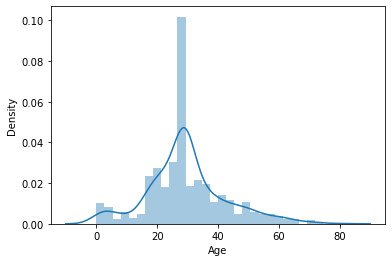

In [24]:
# Age column

sns.distplot(df['Age'])

print(df['Age'].skew())

print(df['Age'].kurt())

<AxesSubplot:xlabel='Age'>

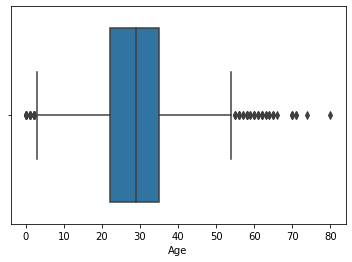

In [25]:
sns.boxplot(df['Age'])

In [26]:
# Just out of curiosity

print("People with age in between 60 and 70 are",df[(df['Age']>60) & (df['Age']<70)].shape[0])
print("People with age greater than 70 and 75 are",df[(df['Age']>=70) & (df['Age']<=75)].shape[0])
print("People with age greater than 75 are",df[df['Age']>75].shape[0])

print('-'*50)

print("People with age between 0 and 1",df[df['Age']<1].shape[0])

People with age in between 60 and 70 are 15
People with age greater than 70 and 75 are 6
People with age greater than 75 are 1
--------------------------------------------------
People with age between 0 and 1 7


<AxesSubplot:xlabel='Fare', ylabel='Density'>

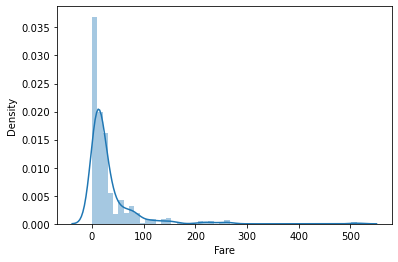

In [27]:
#column of Fare
sns.distplot(df['Fare'])

In [28]:
print(df['Fare'].skew())
print(df['Fare'].kurt())

4.787316519674893
33.39814088089868


<AxesSubplot:xlabel='Fare'>

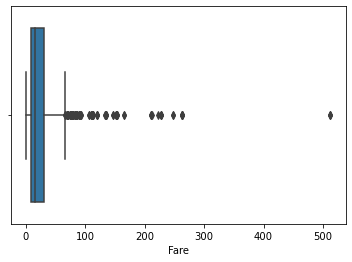

In [29]:
sns.boxplot(df['Fare'])

# Multivariate Analysis

Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


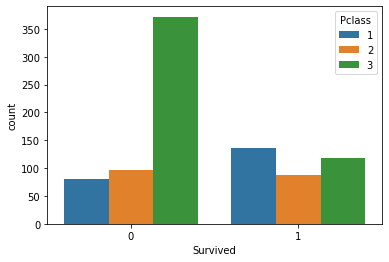

In [32]:
# Survival with Pclass
sns.countplot(df['Survived'], hue=df['Pclass'])
pd.crosstab(df['Pclass'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Survived,0,1
Sex,,
female,25.8,74.2
male,81.1,18.9


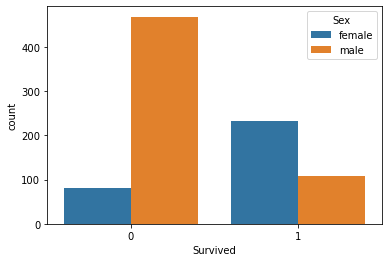

In [33]:
#Survival with Sex

sns.countplot(df['Survived'], hue=df['Sex'])
pd.crosstab(df['Sex'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Survived,0,1
Embarked.,,
C,44.6,55.4
Q,61.0,39.0
S,66.1,33.9


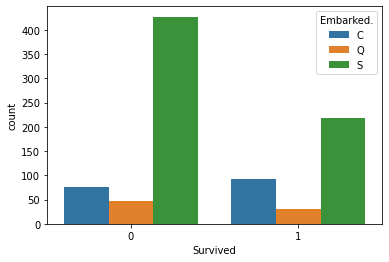

In [36]:
#Survival with Embarked.

sns.countplot(df['Survived'], hue=df['Embarked.'])
pd.crosstab(df['Embarked.'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

<AxesSubplot:xlabel='Age', ylabel='Density'>

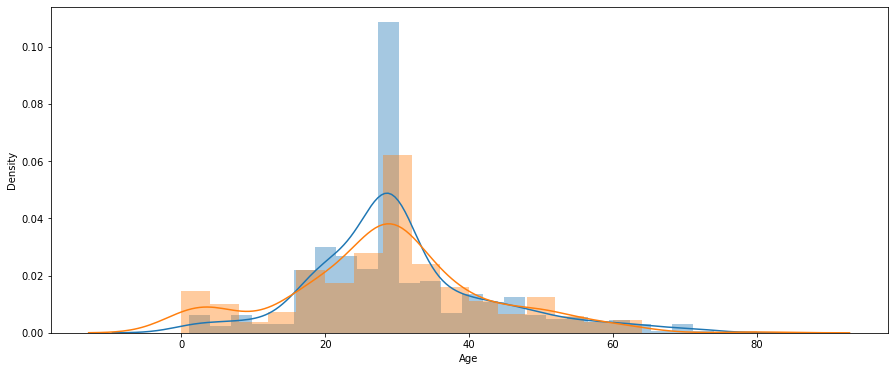

In [37]:
#Survived with Age

plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived']==0]['Age'])
sns.distplot(df[df['Survived']==1]['Age'])

# Conclusions
Chance of female survival is higher than male survival
People in the age range of 20 to 40 had a higher chance of not surviving
Somehow, people going to C survived more
People travelling with smaller familes had a higher chance of surviving the accident in comparison to people with large families and travelling alone